# EDA para información entregada por Sernapesca

#### Introducción
Este Noteboopk corresponde al análisis exploratorio del archivo enviado por sernapesca llamado "Listado de plantas.xlsx", el cual tiene información de las plantas de procesamiento, como su ubicación, lo cual se puede cruzar con el reporte de plantas.
 
Resumen:
* Tiene una dimensión de (64054, 22)
* Este archivo es una tabla con los ingresos a las plantas, entrega información de los centros de cultivo de origen.
* Es solo para la Región de Los Lagos.
* Tiene una temporalidad mensual que va desde 2021-01-01 hasta el 2022-06-01 con datos para todos los meses.
* Tiene varios tipos de especies.

### Import libreries

In [1]:
import logging
import subprocess
import os   
import pandas as pd
import seaborn as sns
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as cx

### Reading file "Ubicación de plantas"

In [2]:
%%time
plants_location = pd.read_excel("../data/datos_sernapesca/Listado de plantas.xlsx")

CPU times: user 175 ms, sys: 4.52 ms, total: 180 ms
Wall time: 225 ms


In [3]:
plants_location.shape

(207, 6)

In [4]:
plants_location.head()

,Cd_Planta,Planta,Dirección_,Ciudad_,X,Y
0,10034,"TRANS ANTARTIC, PESQUERA LTDA.","Camino A Chinquihue Km. 6, Puerto Montt",Puerto Montt,NaN,NaN
1,10056,SOCIEDAD PESQUERA PALCO CHILE LTDA.,"Piedra Azul, Sector Ralimo Km. 17, Puerto Montt",Puerto Montt,-72.778708,-41.514760
2,10064,PESQUERA DEL MAR ANTÁRTICO S.A.,"Bima 338, Puerto Montt",Puerto Montt,-72.960587,-41.454945
3,10067,CERMAQ CHILE S.A.,"Camino Chinquihue Km. 12, Puerto Montt",Puerto Montt,-73.029519,-41.514035
4,10068,DISTRIBUIDORA DE PRODUCTOS DEL MAR S.A.,"El Teniente N° 90, Parque Industrial",Puerto Montt,-72.963898,-41.454908


In [5]:
plants_location.columns.to_list()

['Cd_Planta', 'Planta', 'Dirección_', 'Ciudad_', 'X', 'Y']

In [6]:
plants_location.info

<bound method DataFrame.info of      Cd_Planta                                          Planta  \
0        10034                  TRANS ANTARTIC, PESQUERA LTDA.   
1        10056             SOCIEDAD PESQUERA PALCO CHILE LTDA.   
2        10064                 PESQUERA DEL MAR ANTÁRTICO S.A.   
3        10067                               CERMAQ CHILE S.A.   
4        10068         DISTRIBUIDORA DE PRODUCTOS DEL MAR S.A.   
..         ...                                             ...   
202      10965  SERVICIOS Y COMERCIALIZADORA MISTER TRAUCO SPA   
203      10966                               LUZALMAR LIMITADA   
204      10967                 PLANTA PROCESADORA PESCAMAR SPA   
205      10968               NANCY ESCOLASTICA GOMEZ VELASQUEZ   
206      10969             PASCUAL ROBINSON ARRIAGADA PROSCHLE   

                                          Dirección_       Ciudad_          X  \
0            Camino A Chinquihue Km. 6, Puerto Montt  Puerto Montt        NaN   
1    Piedra A

In [7]:
plants_location.describe()

,Cd_Planta,X,Y
count,207.000000,113.000000,113.000000
mean,10735.787440,-73.440878,-42.031467
std,243.909328,0.326053,0.552087
min,10034.000000,-73.910763,-43.138433
25%,10678.500000,-73.708673,-42.390030
50%,10797.000000,-73.585325,-41.839118
75%,10914.500000,-73.126512,-41.564611
max,10969.000000,-72.778708,-41.418443


In [8]:
plants_location.duplicated().sum()

0

In [9]:
plants_location.isnull().sum()

Cd_Planta      0
Planta         0
Dirección_     0
Ciudad_        0
X             94
Y             94
dtype: int64

In [10]:
plants_location.dtypes

Cd_Planta       int64
Planta         object
Dirección_     object
Ciudad_        object
X             float64
Y             float64
dtype: object

In [11]:
plants_location.columns.to_list()

['Cd_Planta', 'Planta', 'Dirección_', 'Ciudad_', 'X', 'Y']

In [12]:
plants_location['Cd_Planta'].nunique()

207

In [13]:
#plants_location['Especie'].unique().tolist()
plants_location['Ciudad_'].unique().tolist()

['Puerto Montt',
 'Calbuco',
 'Ancud',
 'Castro',
 'Quellon',
 'Pto. Montt',
 'Puerto Varas',
 'Quemchi',
 'Llanquihue',
 'Chonchi',
 'Dalcahue',
 'Quellón',
 'Palena',
 'Maullin',
 'Maullín',
 'Carelmapu',
 'Queilen',
 'Las Quemas',
 'Puerto Octay',
 'Chaulinec',
 'Puyehue',
 'Osorno',
 'Muermos',
 'Contao']

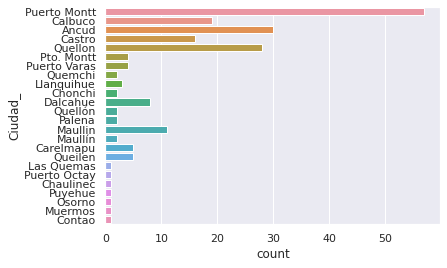

In [14]:
def count_clases(df, column_name):
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(y=column_name, data=df)
    sns.set(rc = {'figure.figsize':(25,8)})
    #for item in ax.get_xticklabels():
    #    item.set_rotation(90)

count_clases(plants_location,'Ciudad_')

In [22]:
plants_location = plants_location[plants_location['X'].notna()]
plants_location = plants_location[plants_location['Y'].notna()]
plantas_gdf = gpd.GeoDataFrame(
    plants_location, geometry=gpd.points_from_xy(plants_location.X, plants_location.Y))


/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


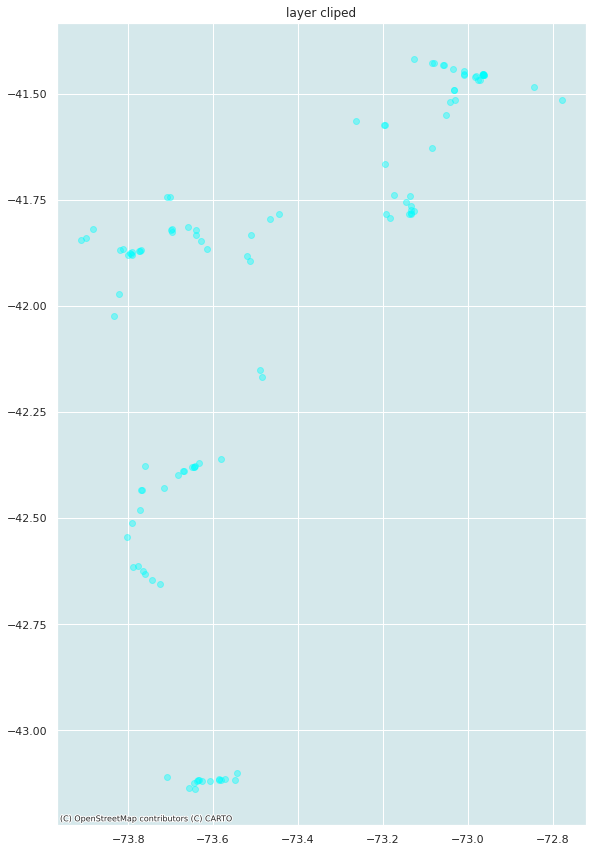

In [23]:
fig, ax = plt.subplots(figsize=(12,12))
plantas_gdf.plot(color='cyan',ax=ax,  alpha=0.4)
ax.ticklabel_format(style='plain')
ax.set_title('layer cliped')
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager)
plt.tight_layout()
plt.show()

In [24]:
export_geojson = '../data/GIS/intermedios/plant_location.geojson'
plantas_gdf.to_file(export_geojson, driver='GeoJSON')